# Assignment 4

### Spam Classification

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping 
import tensorflow 
from tensorflow.keras.preprocessing.sequence import pad_sequences

#### Read CSV File

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


#### Model Creation

In [7]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [9]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

#### Adding Layers

In [10]:
def RNN_model():
 inputs = Input(name='inputs', shape=(max_len))
 layer = Embedding(max_words, 50, input_length=max_len)(inputs)
 layer = LSTM(64)(layer)
 layer = Dense(256, name='FC1')(layer)
 layer = Activation('relu')(layer)
 layer = Dropout(0.5)(layer)
 layer = Dense(1, name='out_layer')(layer)
 layer = Activation('sigmoid')(layer)
 model = Model(inputs=inputs, outputs=layer)
 return model


#### Model Compilation

In [11]:
model = RNN_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

#### Model Fit

In [13]:
data = model.fit(sequences_matrix, Y_train, batch_size=16, epochs=10, validation_split=0.25)


Epoch 1/10
183/183 [==============================] - 19s 81ms/step - loss: 0.1915 - accuracy: 0.9391 - val_loss: 0.0591 - val_accuracy: 0.9836
Epoch 2/10
183/183 [==============================] - 15s 79ms/step - loss: 0.0332 - accuracy: 0.9918 - val_loss: 0.0645 - val_accuracy: 0.9826
Epoch 3/10
183/183 [==============================] - 14s 78ms/step - loss: 0.0133 - accuracy: 0.9966 - val_loss: 0.0737 - val_accuracy: 0.9836
Epoch 4/10
183/183 [==============================] - 15s 80ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0791 - val_accuracy: 0.9826
Epoch 5/10
183/183 [==============================] - 14s 75ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.0662 - val_accuracy: 0.9846
Epoch 6/10
183/183 [==============================] - 13s 72ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0823 - val_accuracy: 0.9846
Epoch 7/10
183/183 [==============================] - 13s 72ms/step - loss: 6.6359e-04 - accuracy: 0.9997 - val_loss: 0.0992 - val_accur

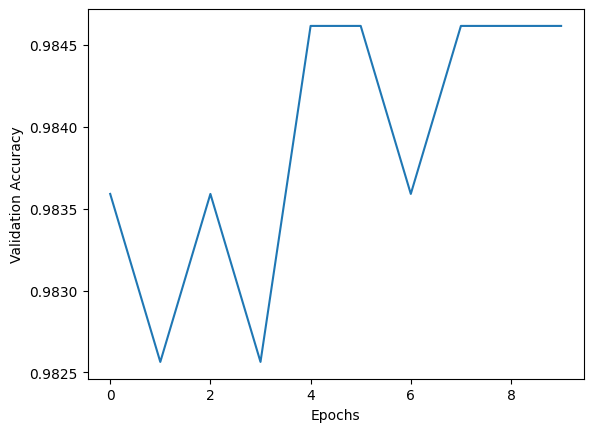

In [14]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(data.epoch,data.history['val_accuracy'])

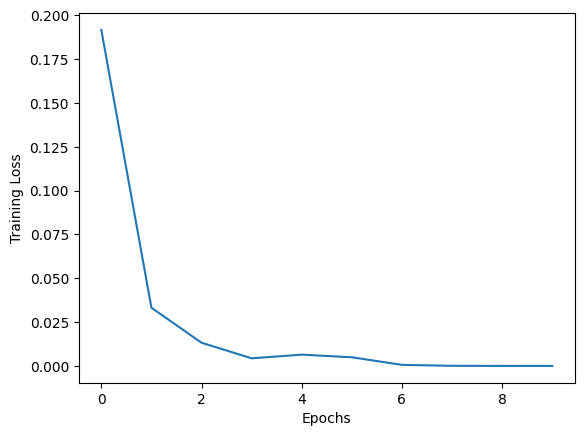

In [15]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.plot(data.epoch, data.history['loss'])

#### Saving Model

In [16]:
model.save('Spam_Detector_model.h5')

#### Testing the Model

In [17]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [18]:
test_accuracy = model.evaluate(test_sequences_matrix, Y_test)


53/53 [==============================] - 2s 29ms/step - loss: 0.1468 - accuracy: 0.9821


In [19]:
model.metrics_names

['loss', 'accuracy']

In [20]:
print('Test Loss: {: 0.4f} and Test Accuracy: {: 0.2f}%'.format(test_accuracy[0], test_accuracy[1]*100))

Test Loss:  0.1468 and Test Accuracy:  98.21%
